In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
data = pd.read_excel('compactiv.xlsx')

In [60]:
data1 = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [61]:
data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [63]:
data.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

In [64]:
print(data.isnull().sum())

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [65]:
print(data.duplicated().sum())

0


In [66]:
label_encoder = LabelEncoder()
data['runqsz'] = label_encoder.fit_transform(data['runqsz'])

# Replace 'Cpu_bound' with 1 and 'Notcpu_bound' with 2
data['runqsz'] = data['runqsz'].replace({0: 1, 1: 2})

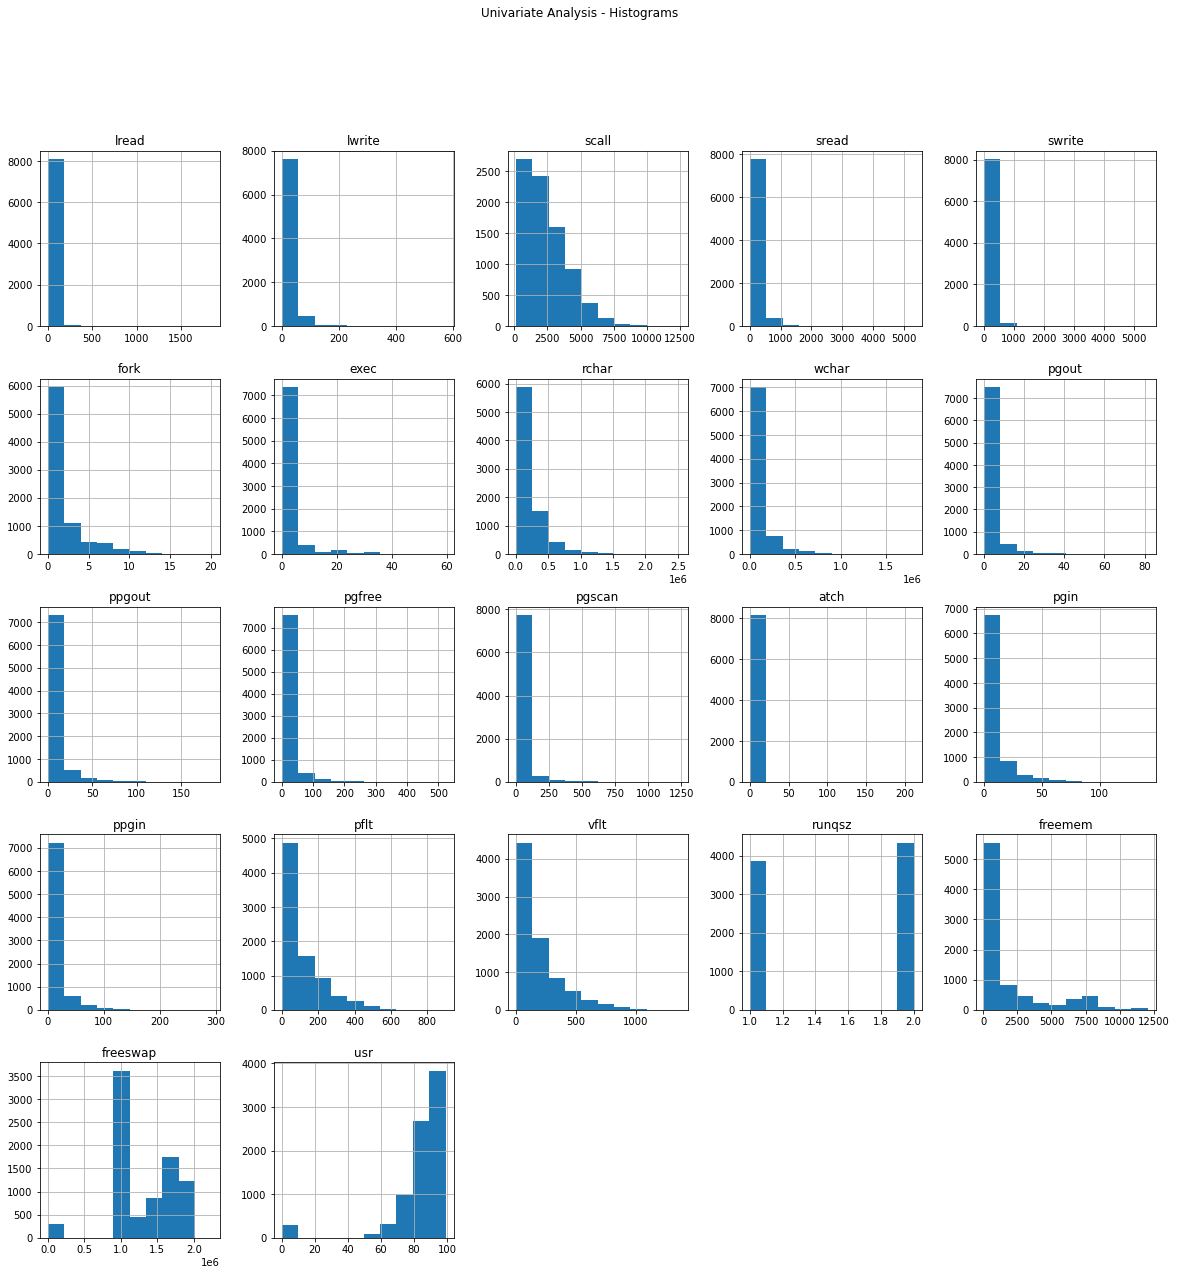

In [67]:
data.hist(figsize=(20, 20))
plt.suptitle("Univariate Analysis - Histograms")
plt.show()

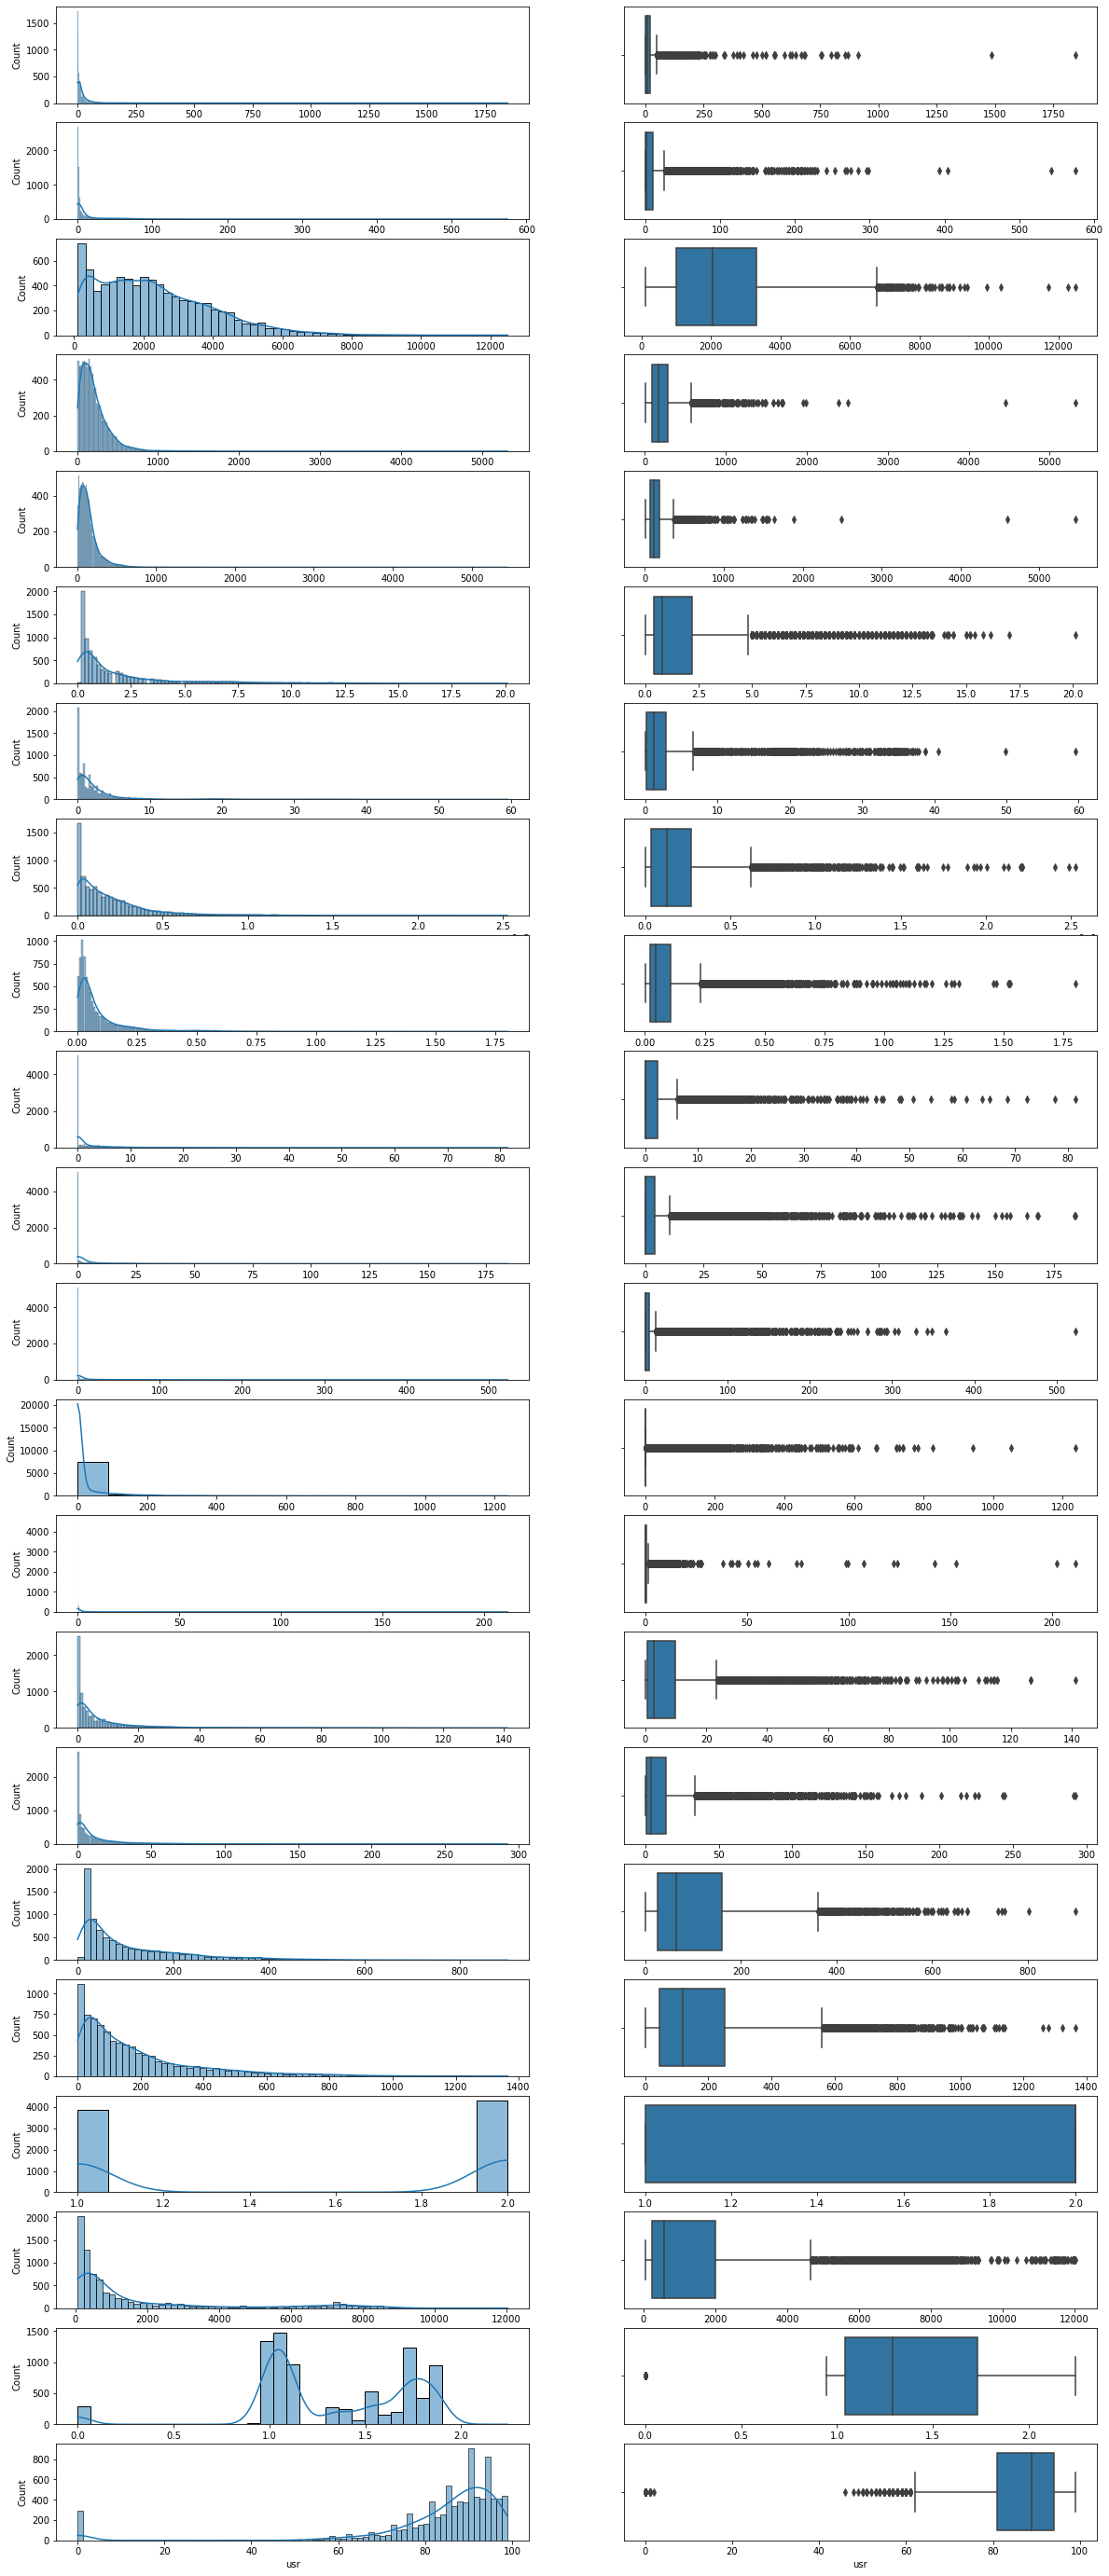

In [68]:
fig, axes = plt.subplots(nrows=22,ncols=2)
fig.set_size_inches(20,50)
sns.histplot(data['lread'], kde=True, ax=axes[0][0])
sns.boxplot(x='lread', data=data, ax=axes[0][1])
sns.histplot(data['lwrite'] , kde=True, ax=axes[1][0])
sns.boxplot(x='lwrite', data=data , ax=axes[1][1])
sns.histplot(data['scall'], kde=True, ax=axes[2][0])
sns.boxplot(x='scall', data=data, ax=axes[2][1])
sns.histplot(data['sread'], kde=True, ax=axes[3][0])
sns.boxplot(x='sread', data=data, ax=axes[3][1])
sns.histplot(data['swrite'], kde=True, ax=axes[4][0])
sns.boxplot(x='swrite', data=data, ax=axes[4][1])
sns.histplot(data['fork'], kde=True, ax=axes[5][0])
sns.boxplot(x='fork', data=data, ax=axes[5][1])
sns.histplot(data['exec'], kde=True, ax=axes[6][0])
sns.boxplot(x='exec', data=data, ax=axes[6][1])
sns.histplot(data['rchar'], kde=True, ax=axes[7][0])
sns.boxplot(x='rchar', data=data, ax=axes[7][1])
sns.histplot(data['wchar'], kde=True, ax=axes[8][0])
sns.boxplot(x='wchar', data=data, ax=axes[8][1])
sns.histplot(data['pgout'], kde=True, ax=axes[9][0])
sns.boxplot(x='pgout', data=data, ax=axes[9][1])
sns.histplot(data['ppgout'], kde=True, ax=axes[10][0])
sns.boxplot(x='ppgout', data=data, ax=axes[10][1])
sns.histplot(data['pgfree'], kde=True, ax=axes[11][0])
sns.boxplot(x='pgfree', data=data, ax=axes[11][1])
sns.histplot(data['pgscan'], kde=True, ax=axes[12][0])
sns.boxplot(x='pgscan', data=data, ax=axes[12][1])
sns.histplot(data['atch'], kde=True, ax=axes[13][0])
sns.boxplot(x='atch', data=data, ax=axes[13][1])
sns.histplot(data['pgin'], kde=True, ax=axes[14][0])
sns.boxplot(x='pgin', data=data, ax=axes[14][1])
sns.histplot(data['ppgin'], kde=True, ax=axes[15][0])
sns.boxplot(x='ppgin', data=data, ax=axes[15][1])
sns.histplot(data['pflt'], kde=True, ax=axes[16][0])
sns.boxplot(x='pflt', data=data, ax=axes[16][1])
sns.histplot(data['vflt'], kde=True, ax=axes[17][0])
sns.boxplot(x='vflt', data=data, ax=axes[17][1])
sns.histplot(data['runqsz'], kde=True, ax=axes[18][0])
sns.boxplot(x='runqsz', data=data, ax=axes[18][1])
sns.histplot(data['freemem'], kde=True, ax=axes[19][0])
sns.boxplot(x='freemem', data=data, ax=axes[19][1])
sns.histplot(data['freeswap'], kde=True, ax=axes[20][0])
sns.boxplot(x='freeswap', data=data, ax=axes[20][1])
sns.histplot(data['usr'], kde=True, ax=axes[21][0])
sns.boxplot(x='usr', data=data, ax=axes[21][1])
plt.show()

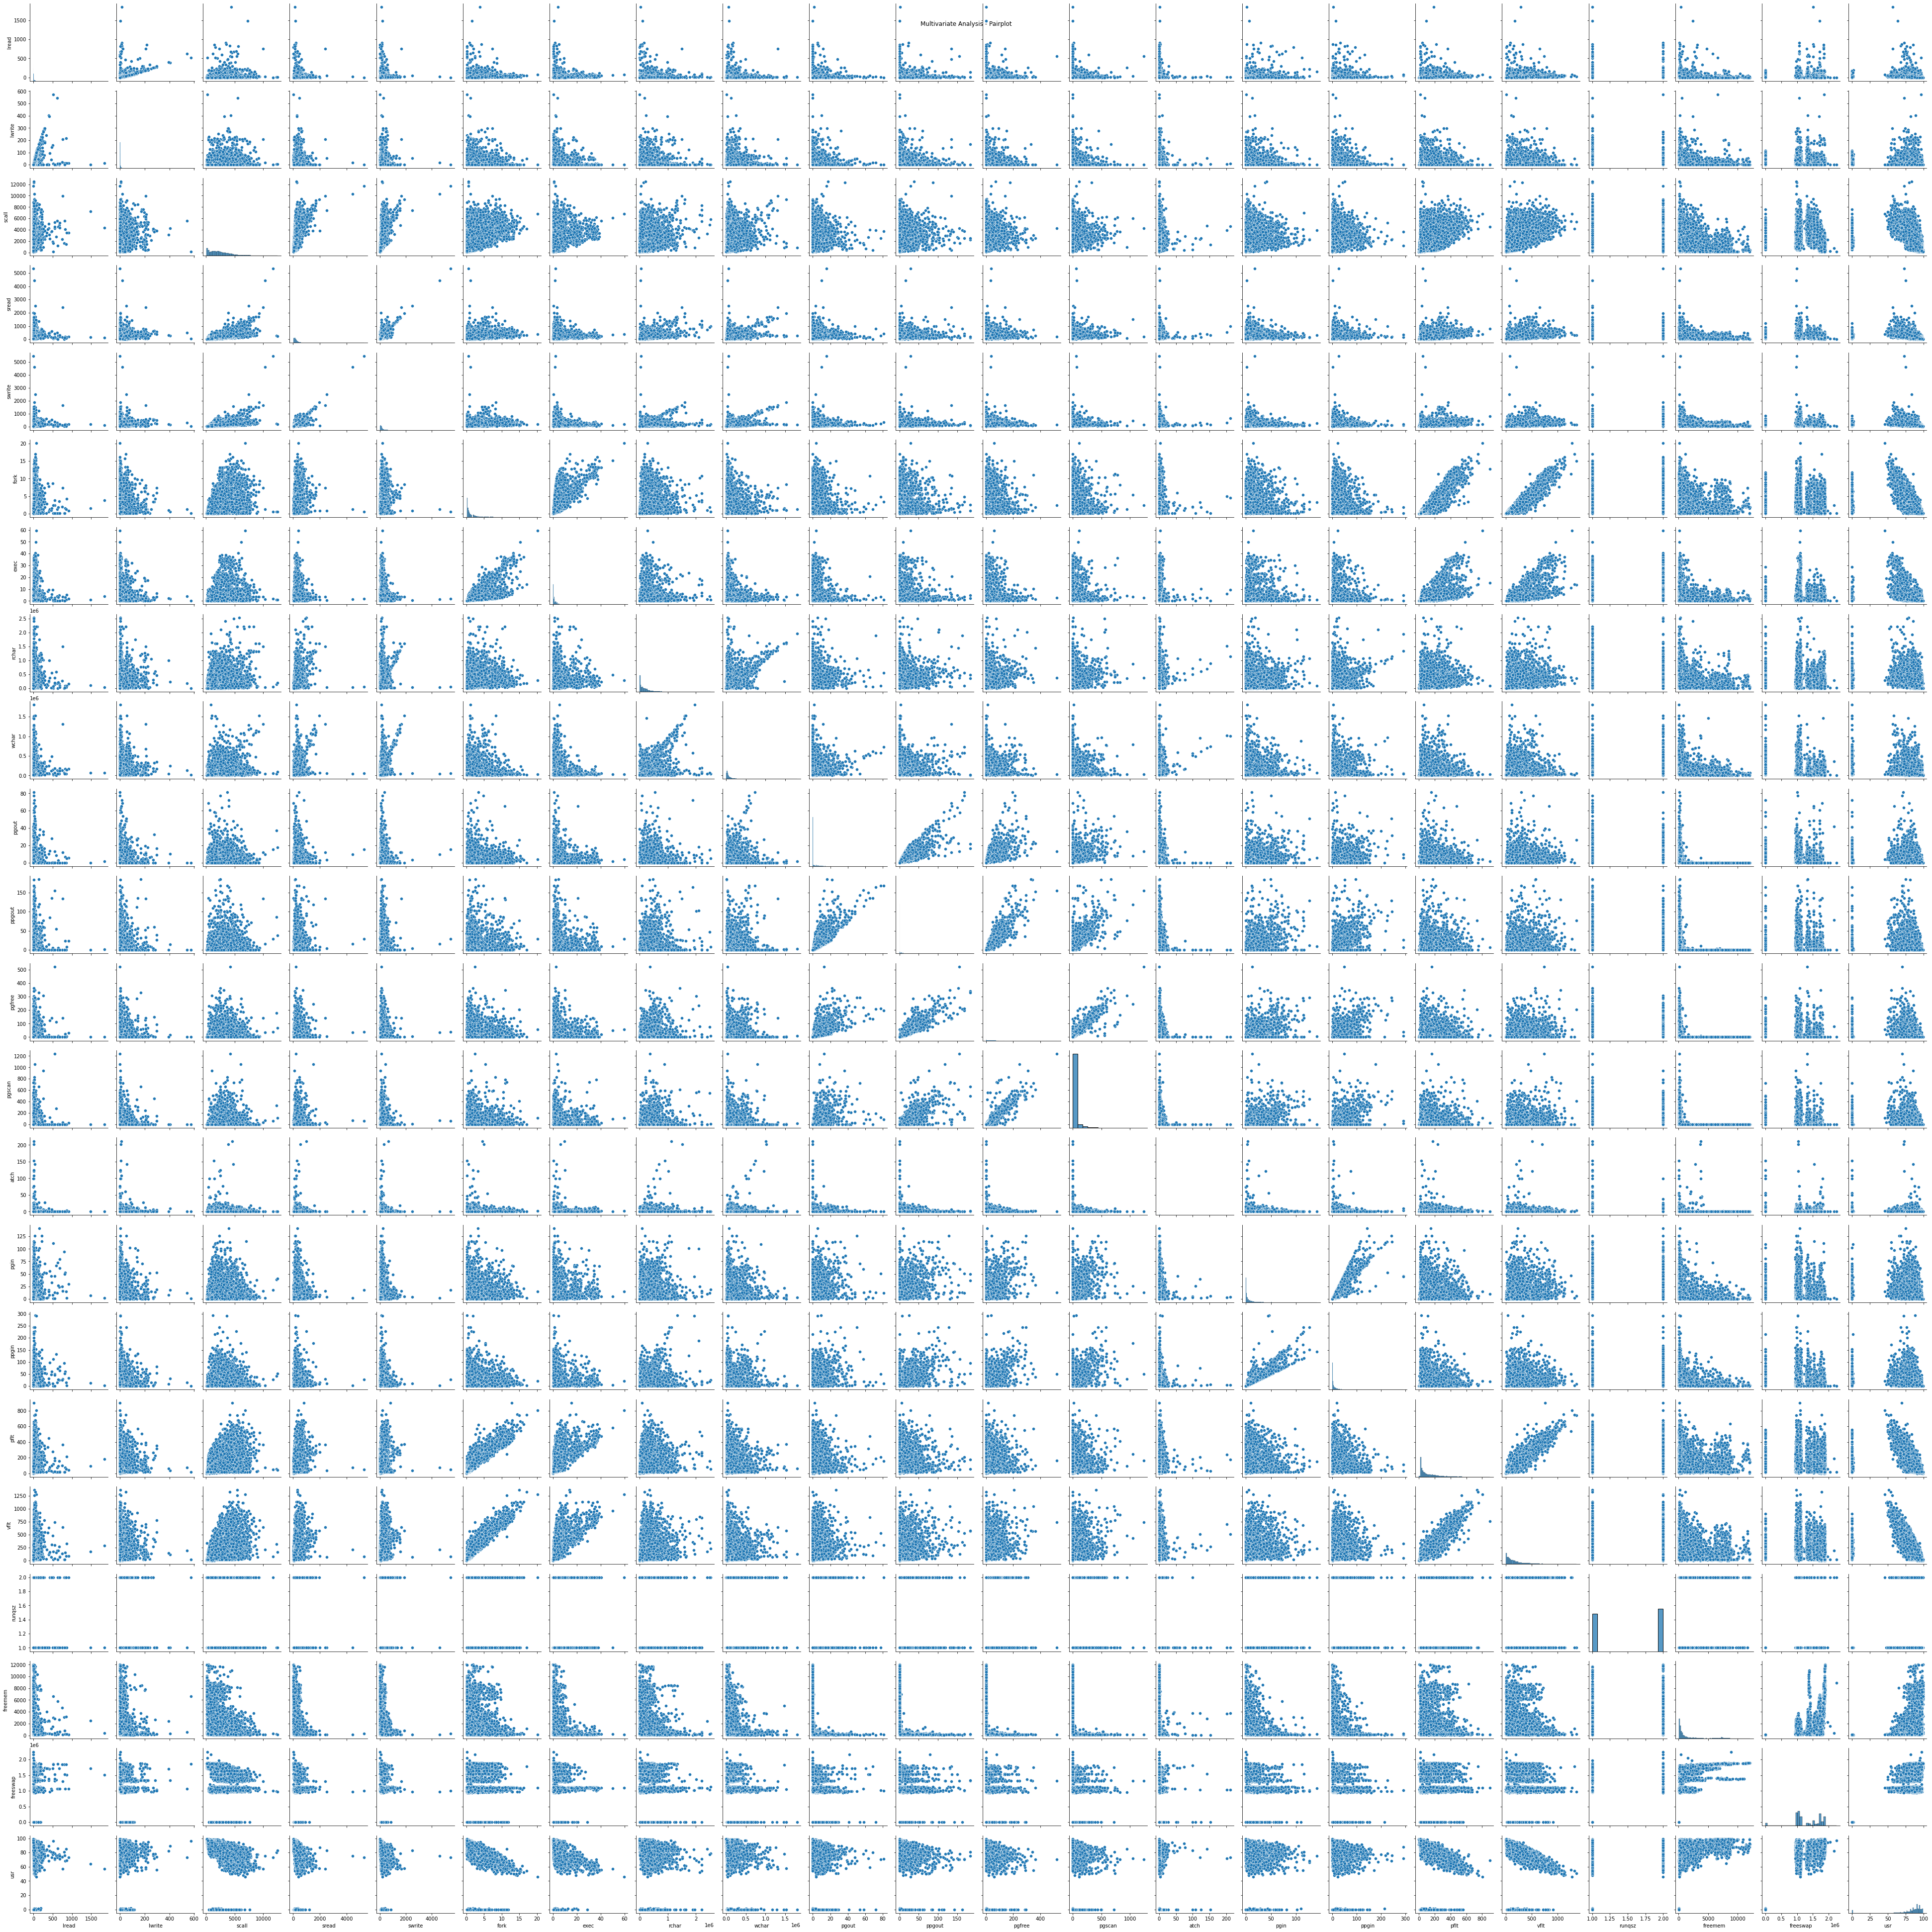

In [69]:
sns.pairplot(data)
plt.suptitle("Multivariate Analysis - Pairplot")
plt.show()

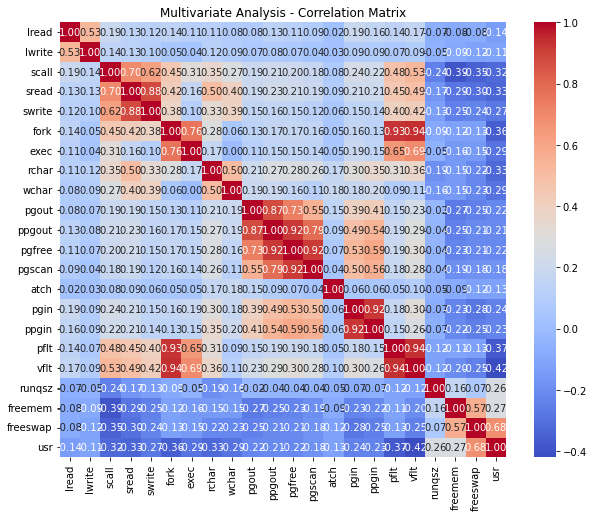

In [70]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multivariate Analysis - Correlation Matrix")
plt.show()

In [71]:
median_value = data['rchar'].median()
data['rchar'].fillna(median_value, inplace=True)

In [72]:
median_value = data['wchar'].median()
data['wchar'].fillna(median_value, inplace=True)

In [73]:
print(data.isnull().sum())

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64


In [74]:
corr_matrix = data.corr()
print(corr_matrix['usr'].sort_values(ascending=False))

usr         1.000000
freeswap    0.678526
freemem     0.270308
runqsz      0.261980
lwrite     -0.111213
atch       -0.125074
lread      -0.141394
pgscan     -0.181488
ppgout     -0.212295
pgfree     -0.216278
pgout      -0.221877
ppgin      -0.233682
pgin       -0.241720
swrite     -0.272252
exec       -0.288526
wchar      -0.289036
scall      -0.323188
rchar      -0.326262
sread      -0.332160
fork       -0.363277
pflt       -0.372495
vflt       -0.420685
Name: usr, dtype: float64


In [84]:
X = data[['freeswap', 'freemem','runqsz','lwrite','atch','lread','pgscan','ppgout','pgfree','pgout','ppgin','pgin','swrite','exec','wchar','scall','rchar','sread','fork','pflt','vflt']]
y = data['usr']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
X_train

freeswap  freemem  runqsz  lwrite  atch  lread  pgscan  ppgout  pgfree  \
2949   1306851      956       1       4   0.0     13     0.0     0.0     0.0   
3281   1775705     4033       1       0   0.0      2     0.0     0.0     0.0   
7961        13       86       1       2   0.4     20    44.4     2.0    22.6   
4507   1435354      236       1       2   1.6     10     0.0     2.4     2.4   
3124   1044506      614       1      78   0.0     56     0.0     0.0     0.0   
...        ...      ...     ...     ...   ...    ...     ...     ...     ...   
4931   1004142      302       2       0   0.0      1     0.0     5.0     5.0   
3264   1720094      667       2      19   0.0     14     0.0     0.0     0.0   
1653   1038861      855       1       0   0.0      1     0.0     0.0     0.0   
2607   1834560     5757       1       1   0.0      1     0.0     0.0     0.0   
2732   1832568     5663       2      21   0.0     13     0.0     0.0     0.0   

      pgout  ...   pgin  swrite  exec     wchar  scall     rchar  sread  fork  \
2949    0.0  ...  20.40     150   2.2   93098.0   5183  237284.0    200   1.6   
3281    0.0  ...   0.20      50   1.6   21646.0    431   45640.0     55   1.4   
7961    1.8  ...  31.60     195   0.8  259833.0   1169  312017.0    194   0.4   
4507    1.8  ...   0.80     306   2.2   14080.0   3408  196093.0    397   5.2   
3124    0.0  ...   2.79     112   2.4   71594.0   1815  103043.0     94   1.6   
...     ...  ...    ...     ...   ...       ...    ...       ...    ...   ...   
4931    2.6  ...   1.40     173   0.2   45906.0   1310   58730.0    187   0.2   
3264    0.0  ...   0.00     141   0.2   12351.0   2283    4429.0     97   0.2   
1653    0.0  ...  22.20     200   5.0  459666.0   3341  191162.0    132   2.4   
2607    0.0  ...   0.40      41   0.2  245749.0    353  263443.0    154   0.2   
2732    0.0  ...   2.60      37   0.2    7024.0   1036   46946.0     58   0.2   

        pflt    vflt  
2949  154.60  312.40  
3281   76.05  102.79  
7961   35.00   75.40  
4507  249.40  417.40  
3124  115.37  168.86  
...      ...     ...  
4931   16.00   47.80  
3264   20.40   17.80  
1653   65.00  155.40  
2607   15.60   16.80  
2732   16.40   17.00  

[6553 rows x 21 columns]

In [108]:
X_test

freeswap  freemem  runqsz  lwrite  atch  lread  pgscan  ppgout  pgfree  \
2310   1051227     2728       2       0  0.00      1    0.00    0.00    0.00   
1916    998441      151       1      54  4.98     42   59.96    0.40   15.34   
3585   1008875      139       2       3  0.00      4    7.78    7.98   11.38   
7404    949230      317       1       6  6.40      9    0.00   17.60   17.60   
5278   1042942      337       1       2  0.80      4    0.00    1.80    1.80   
...        ...      ...     ...     ...   ...    ...     ...     ...     ...   
4731         7       93       1       0  0.00      3    0.00    0.00    0.00   
6739   1310246      343       1      10  4.80     21    0.80   12.80    8.40   
4265   1709802      165       1       0  0.00      1    0.00    0.60    0.60   
6072   1703808      337       1       0  0.00      0    0.00    0.40    0.40   
6485   1537662      914       1       5  0.20     24    0.00    0.00    0.00   

      pgout  ...   pgin  swrite  exec    wchar  scall     rchar  sread  fork  \
2310   0.00  ...   0.40     167  2.40  93523.0   2164  249529.0    166  0.60   
1916   0.40  ...   6.97     336  2.79  28167.0   3844  380591.0    490  4.98   
3585   3.99  ...   0.00     107  0.60  61464.0   1357   44343.0    150  0.40   
7404  11.00  ...  28.40      79  3.40  55307.0   1042  135900.0    109  2.00   
5278   1.80  ...   7.41     190  1.00  53346.0   2821  650097.0    320  0.80   
...     ...  ...    ...     ...   ...      ...    ...       ...    ...   ...   
4731   0.00  ...   1.60     116  0.60  32924.0    943   34217.0    119  0.80   
6739   1.40  ...  17.80     266  2.40  94229.0   3862  111286.0    239  2.40   
4265   0.40  ...   0.80      64  0.20  12370.0   1493   18589.0     47  0.20   
6072   0.20  ...  10.00     119  0.20  69327.0   1512  114263.0    106  0.20   
6485   0.00  ...   1.40     137  1.40  50462.0   2198   49285.0    134  1.40   

        pflt    vflt  
2310   50.40   61.00  
1916  304.58  518.92  
3585   23.75   45.31  
7404  155.00  267.60  
5278   66.53  113.23  
...      ...     ...  
4731   58.40  130.00  
6739   96.80  223.80  
4265   17.60   25.60  
6072   15.60   22.20  
6485   80.00   98.00  

[1639 rows x 21 columns]

In [109]:
y_train

2949    76
3281    91
7961     0
4507    79
3124    88
        ..
4931    90
3264    95
1653    84
2607    98
2732    96
Name: usr, Length: 6553, dtype: int64

In [110]:
y_test

2310    93
1916    78
3585    92
7404    84
5278    85
        ..
4731     0
6739    88
4265    96
6072    90
6485    89
Name: usr, Length: 1639, dtype: int64

In [112]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [113]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared: %.3f' % r2)

R-squared: 0.641


In [122]:
x_train_with_intercept = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, x_train_with_intercept)
results = model.fit()

# Access the adjusted R-squared
adjusted_r_squared = results.rsquared_adj

print(f'Adjusted R-squared: {adjusted_r_squared}')

# Print the full regression summary
print(results.summary())

Adjusted R-squared: 0.6383427346394848
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     551.7
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:03:08   Log-Likelihood:                -24985.
No. Observations:                6553   AIC:                         5.001e+04
Df Residuals:                    6531   BIC:                         5.016e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [114]:
new_data = [[998441,134,2,52,3.58,35,67.96,0.80,1.2,15.34,0.40,6.97,336,2.79,28167.0,3844,380591.0,490,4.98,304.58,518.92]]
usr_pred = regressor.predict(new_data)
print('Predicted usr percentage: %.2f' % usr_pred[0])

Predicted usr percentage: 72.96


/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [117]:
model = LinearRegression()
model.fit(X_train, y_train)

# Accessing the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
import statsmodels.api as sm

# Add a constant term for intercept
x_train_with_intercept = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, x_train_with_intercept)
ols_results = ols_model.fit()

# Print the regression results
print(ols_results.summary())

Coefficients: [ 3.28403246e-05 -1.64314644e-03  7.96119153e+00  9.44834666e-03
 -4.68654717e-02 -2.20418917e-02  1.16968577e-02  1.14173020e-01
 -7.68105192e-02 -2.25130008e-01 -2.68254019e-02  3.80551941e-02
 -1.66511778e-03 -2.16441903e-02 -1.07011723e-05  1.04019980e-03
 -3.48192174e-06 -3.32425063e-05 -2.02012952e+00 -3.87439887e-02
  2.32054134e-02]
Intercept: 35.4048074032581
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     551.7
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:59:43   Log-Likelihood:                -24985.
No. Observations:                6553   AIC:                         5.001e+04
Df Residuals:                    6531   BIC:                  

In [121]:
# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE on training set: {rmse_train}')
print(f'RMSE on test set: {rmse_test}')

RMSE on training set: 10.954819738366961
RMSE on test set: 11.386257747878616


In [123]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [124]:
data1.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [125]:
data1.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

In [126]:
data1['Contraceptive_method_used'].unique()

array(['No', 'Yes'], dtype=object)

In [127]:
data1.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [130]:
print(data1.isnull().sum())

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [131]:
print(data1.duplicated().sum())

80


In [132]:
median_value = data1['Wife_age'].median()
data1['Wife_age'].fillna(median_value, inplace=True)

In [133]:
median_value = data1['No_of_children_born'].median()
data1['No_of_children_born'].fillna(median_value, inplace=True)

In [134]:
print(data1.isnull().sum())

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64


In [135]:
data1.drop_duplicates(inplace=True)

In [136]:
print(data1.duplicated().sum())

0


In [138]:
df = data1.select_dtypes(include='number')
extra_df = data1.select_dtypes(exclude='number')

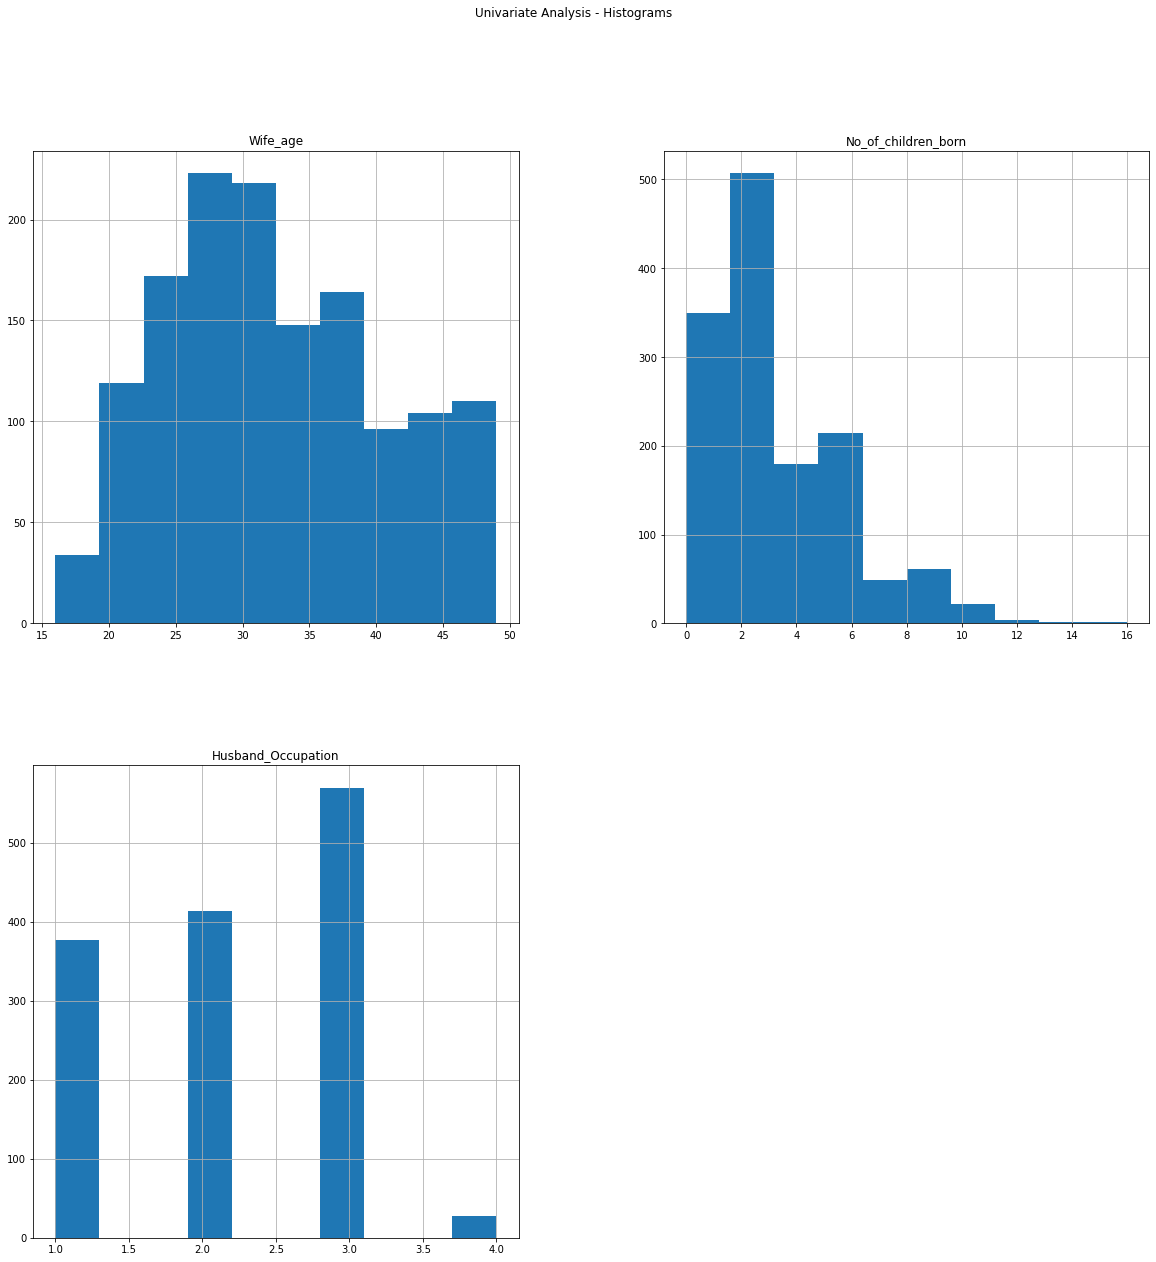

In [142]:
data1.hist(figsize=(20, 20))
plt.suptitle("Univariate Analysis - Histograms")
plt.show()

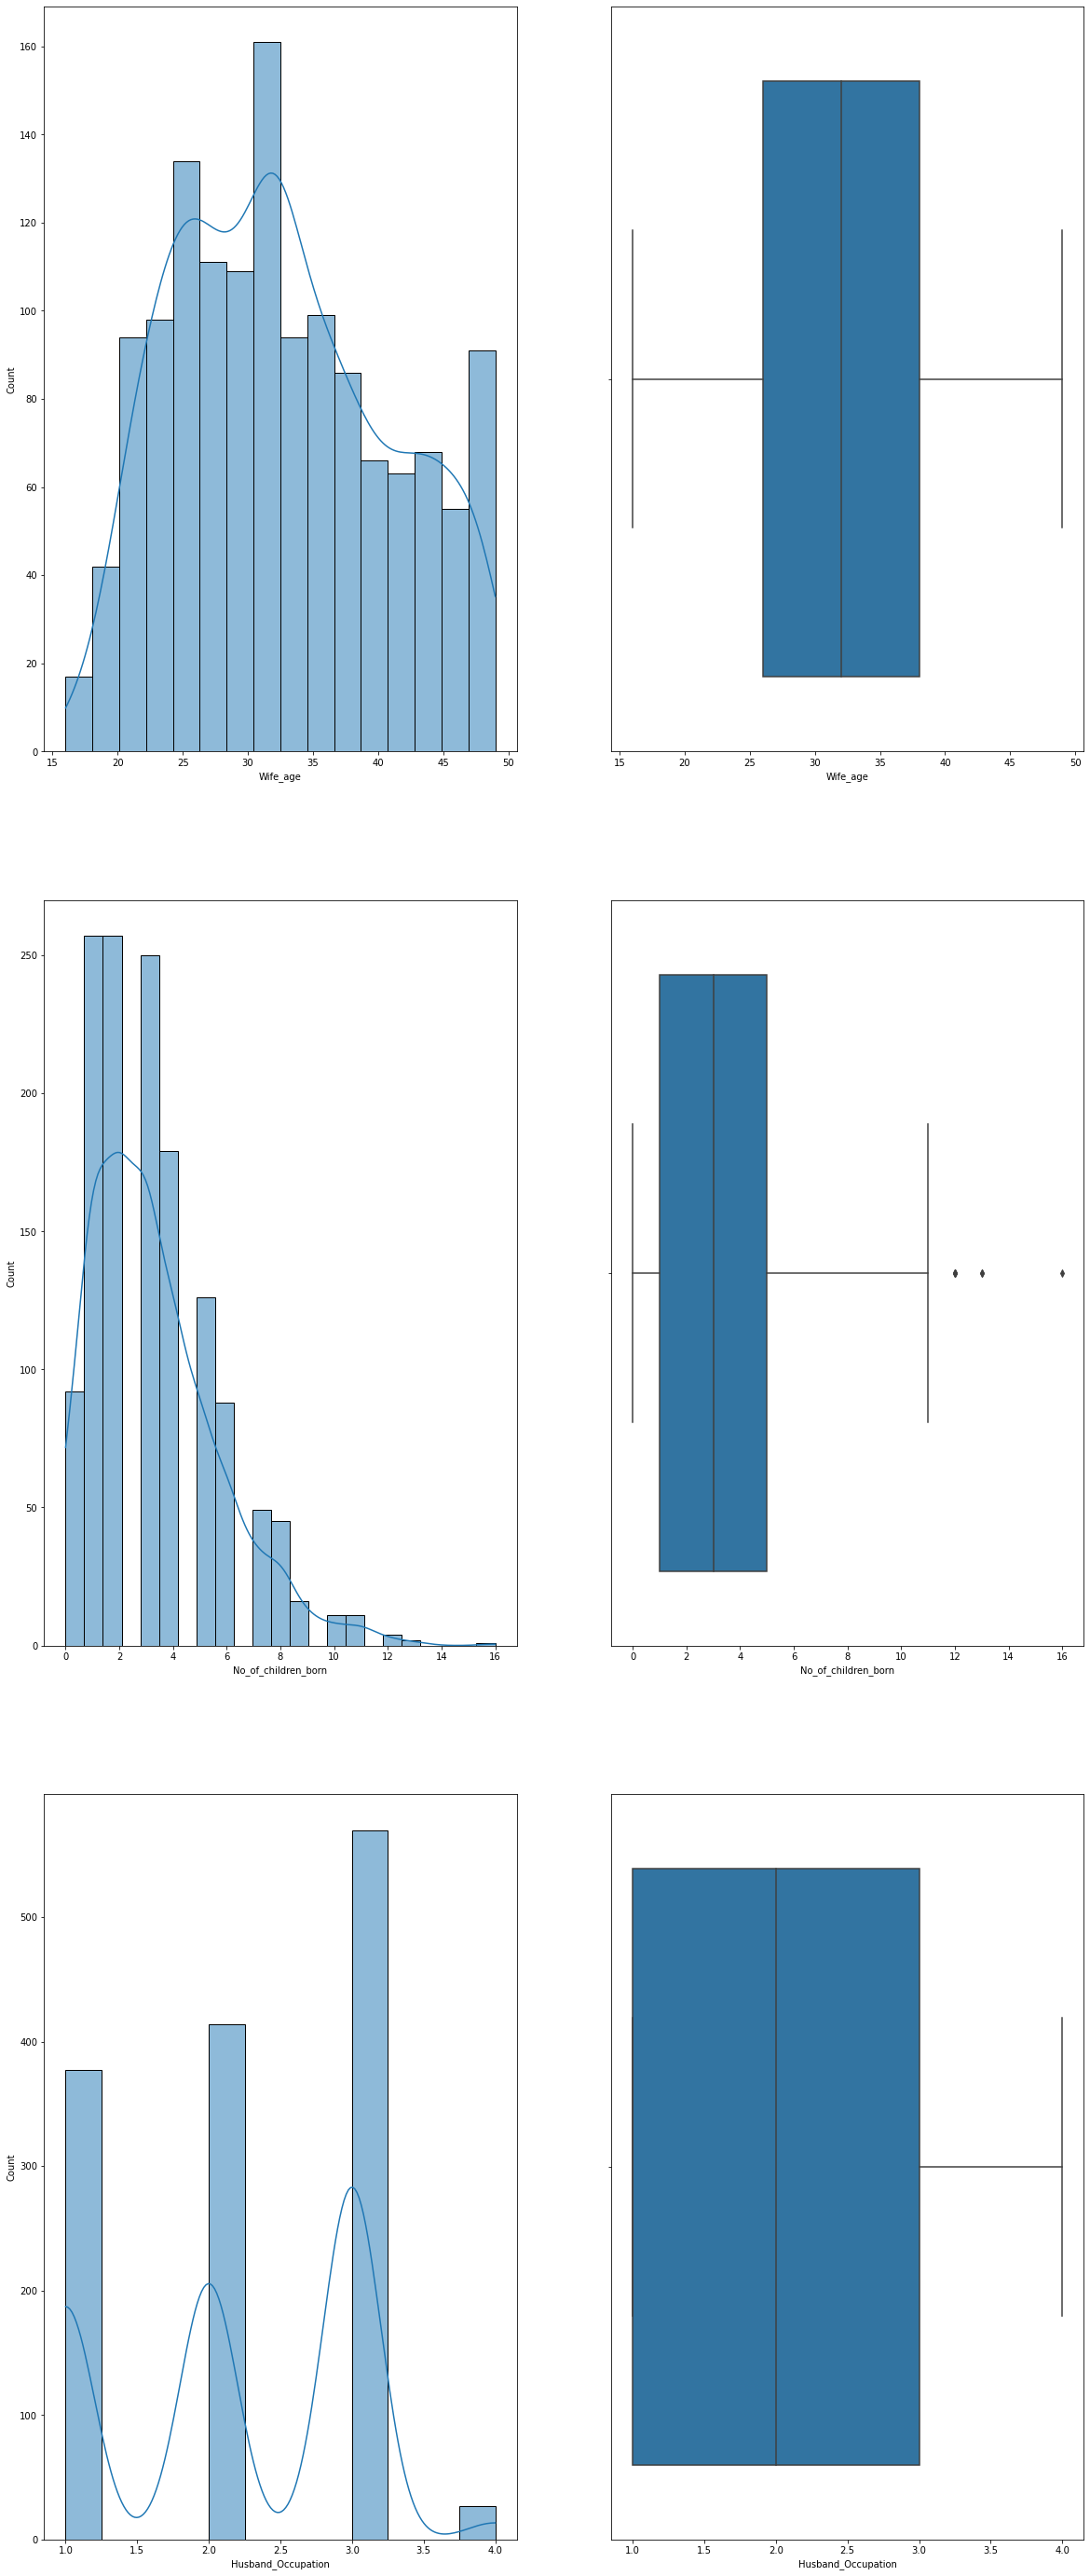

In [141]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,50)
sns.histplot(df['Wife_age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Wife_age', data=df, ax=axes[0][1])
sns.histplot(df['No_of_children_born'] , kde=True, ax=axes[1][0])
sns.boxplot(x='No_of_children_born', data=df , ax=axes[1][1])
sns.histplot(df['Husband_Occupation'], kde=True, ax=axes[2][0])
sns.boxplot(x='Husband_Occupation', data=df, ax=axes[2][1])
plt.show()

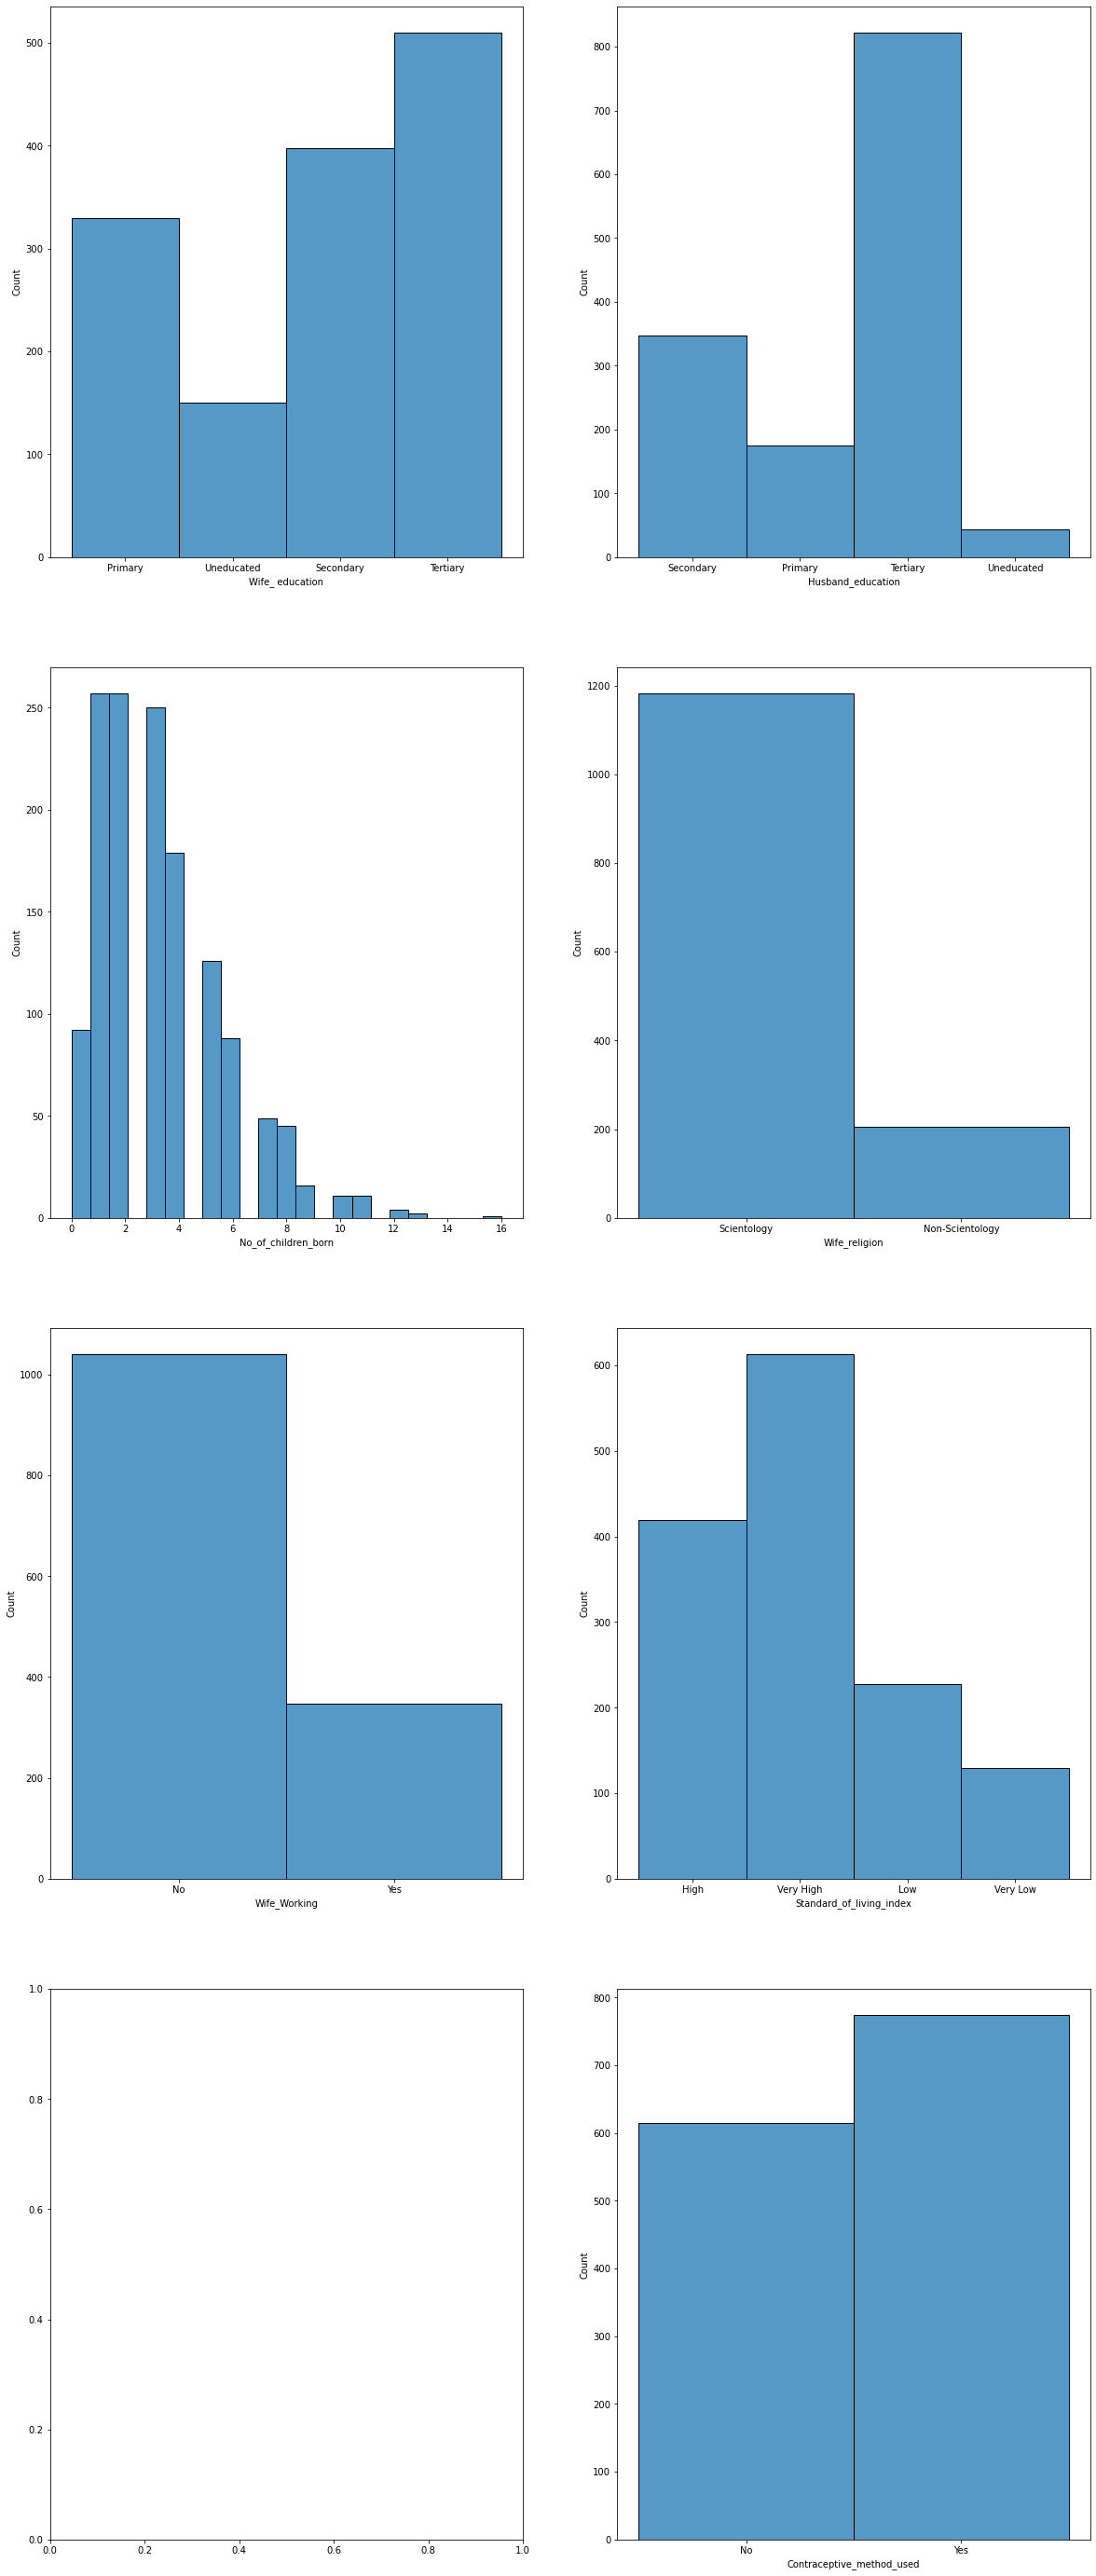

In [146]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,50)
sns.histplot(data1['Wife_ education'], ax=axes[0][0])
sns.histplot(data1['Husband_education'], ax=axes[0][1])
sns.histplot(data1['No_of_children_born'], ax=axes[1][0])
sns.histplot(data1['Wife_religion'], ax=axes[1][1])
sns.histplot(data1['Wife_Working'], ax=axes[2][0])
sns.histplot(data1['Standard_of_living_index'], ax=axes[2][1])
sns.histplot(data1['Contraceptive_method_used'], ax=axes[3][1])
plt.show()

In [143]:
data1.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1466      42.0         Primary          Tertiary                  3.0   
1468      33.0        Tertiary          Tertiary                  3.0   
1470      39.0       Secondary         Secondary                  3.0   
1471      33.0       Secondary         Secondary                  3.0   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1466   Scientology           No                   2                Very High   
1468   Scientology          Yes                   2                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1466         Exposed                       Yes  
1468         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

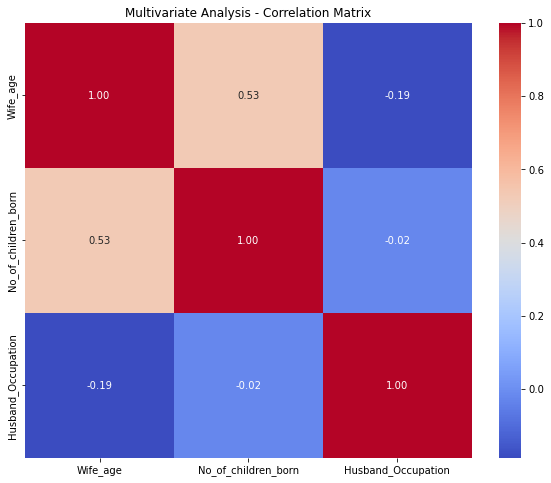

In [147]:
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multivariate Analysis - Correlation Matrix")
plt.show()

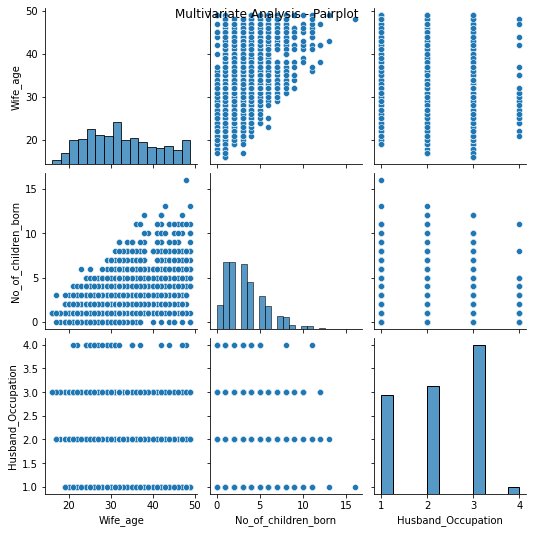

In [148]:
sns.pairplot(data1)
plt.suptitle("Multivariate Analysis - Pairplot")
plt.show()

In [151]:
label_encoder = LabelEncoder()
data1['Contraceptive_method_used'] = label_encoder.fit_transform(data1['Contraceptive_method_used'])

# Replace 'Cpu_bound' with 1 and 'Notcpu_bound' with 2
data1['Contraceptive_method_used'] = data1['Contraceptive_method_used'].replace({0: 1, 1: 2})

In [153]:
data1=pd.get_dummies(data1)

In [154]:
data1

Wife_age  No_of_children_born  Wife_religion  Wife_Working  \
0         24.0                  3.0              2             1   
1         45.0                 10.0              2             1   
2         43.0                  7.0              2             1   
3         42.0                  9.0              2             1   
4         36.0                  8.0              2             1   
...        ...                  ...            ...           ...   
1466      42.0                  3.0              2             1   
1468      33.0                  3.0              2             2   
1470      39.0                  3.0              2             2   
1471      33.0                  3.0              2             2   
1472      17.0                  1.0              2             1   

      Husband_Occupation  Contraceptive_method_used  Wife_ education_Primary  \
0                      2                          1                        1   
1                      3                          1                        0   
2                      3                          1                        1   
3                      3                          1                        0   
4                      3                          1                        0   
...                  ...                        ...                      ...   
1466                   2                          2                        1   
1468                   2                          2                        0   
1470                   1                          2                        0   
1471                   2                          2                        0   
1472                   2                          2                        0   

      Wife_ education_Secondary  Wife_ education_Tertiary  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             1                         0   
4                             1                         0   
...                         ...                       ...   
1466                          0                         0   
1468                          0                         1   
1470                          1                         0   
1471                          1                         0   
1472                          1                         0   

      Wife_ education_Uneducated  Husband_education_Primary  \
0                              0                          0   
1                              1                          0   
2                              0                          0   
3                              0                          1   
4                              0                          0   
...                          ...                        ...   
1466                           0                          0   
1468                           0                          0   
1470                           0                          0   
1471                           0                          0   
1472                           0                          0   

      Husband_education_Secondary  Husband_education_Tertiary  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               0                           0   
4                               1                           0   
...                           ...                         ...   
1466                            0                           1   
1468                            0                           1   
1470                            1                           0   
1471                            1                           0   
1472                   

In [156]:
X = data1.drop('Contraceptive_method_used', axis=1)
y = data1['Contraceptive_method_used']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
X_train

Wife_age  No_of_children_born  Wife_religion  Wife_Working  \
593       27.0                  2.0              2             2   
1173      16.0                  1.0              2             1   
418       26.0                  2.0              2             2   
495       48.0                  4.0              1             1   
1109      35.0                  3.0              2             1   
...        ...                  ...            ...           ...   
789       20.0                  2.0              2             1   
866       26.0                  3.0              2             2   
1287      24.0                  1.0              1             1   
569       39.0                  3.0              1             2   
704       22.0                  2.0              2             1   

      Husband_Occupation  Wife_ education_Primary  Wife_ education_Secondary  \
593                    1                        0                          0   
1173                   3                        1                          0   
418                    1                        0                          0   
495                    1                        0                          0   
1109                   1                        0                          0   
...                  ...                      ...                        ...   
789                    3                        1                          0   
866                    3                        0                          0   
1287                   2                        0                          0   
569                    1                        0                          0   
704                    2                        0                          1   

      Wife_ education_Tertiary  Wife_ education_Uneducated  \
593                          1                           0   
1173                         0                           0   
418                          1                           0   
495                          1                           0   
1109                         1                           0   
...                        ...                         ...   
789                          0                           0   
866                          0                           1   
1287                         1                           0   
569                          1                           0   
704                          0                           0   

      Husband_education_Primary  Husband_education_Secondary  \
593                           0                            0   
1173                          0                            0   
418                           0                            0   
495                           0                            0   
1109                          0                            0   
...                         ...                          ...   
789                           1                            0   
866                           1                            0   
1287                          0                            0   
569                           0                            0   
704                           1                            0   

      Husband_education_Tertiary  Husband_education_Uneducated  \
593                            1                             0   
1173                           1                             0   
418                            1                             0   
495                            1                             0   
1109                           1                             0   
...                          ...                           ...   
789                            0                             0   
866                            0                             0   
1287                           1                             0   
569                            1                      

In [159]:
X_test

Wife_age  No_of_children_born  Wife_religion  Wife_Working  \
685       29.0                  1.0              2             1   
317       30.0                  5.0              2             2   
1076      43.0                  3.0              1             1   
843       28.0                  2.0              2             1   
142       47.0                  1.0              2             2   
...        ...                  ...            ...           ...   
1412      32.0                  3.0              2             1   
475       34.0                  3.0              2             1   
977       38.0                  3.0              1             2   
633       44.0                  3.0              2             2   
1395      32.0                  3.0              2             1   

      Husband_Occupation  Wife_ education_Primary  Wife_ education_Secondary  \
685                    3                        0                          1   
317                    3                        0                          1   
1076                   2                        0                          0   
843                    3                        0                          1   
142                    1                        0                          0   
...                  ...                      ...                        ...   
1412                   3                        0                          1   
475                    1                        0                          0   
977                    3                        0                          0   
633                    1                        0                          0   
1395                   3                        0                          1   

      Wife_ education_Tertiary  Wife_ education_Uneducated  \
685                          0                           0   
317                          0                           0   
1076                         1                           0   
843                          0                           0   
142                          1                           0   
...                        ...                         ...   
1412                         0                           0   
475                          1                           0   
977                          1                           0   
633                          1                           0   
1395                         0                           0   

      Husband_education_Primary  Husband_education_Secondary  \
685                           0                            1   
317                           0                            1   
1076                          0                            0   
843                           0                            0   
142                           0                            0   
...                         ...                          ...   
1412                          0                            0   
475                           0                            0   
977                           0                            0   
633                           0                            0   
1395                          1                            0   

      Husband_education_Tertiary  Husband_education_Uneducated  \
685                            0                             0   
317                            0                             0   
1076                           1                             0   
843                            1                             0   
142                            1                             0   
...                          ...                           ...   
1412                           1                             0   
475                            1                             0   
977                            1                             0   
633                            1                      

In [160]:
y_train

593     2
1173    1
418     2
495     2
1109    1
       ..
789     2
866     2
1287    2
569     2
704     2
Name: Contraceptive_method_used, Length: 1110, dtype: int64

In [161]:
y_test

685     2
317     1
1076    1
843     2
142     1
       ..
1412    2
475     2
977     2
633     2
1395    2
Name: Contraceptive_method_used, Length: 278, dtype: int64

In [162]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [163]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared: %.3f' % r2)

R-squared: 0.110


In [164]:
x_train_with_intercept = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, x_train_with_intercept)
results = model.fit()

# Access the adjusted R-squared
adjusted_r_squared = results.rsquared_adj

print(f'Adjusted R-squared: {adjusted_r_squared}')

# Print the full regression summary
print(results.summary())

Adjusted R-squared: 0.1337729494046611
                                OLS Regression Results                               
Dep. Variable:     Contraceptive_method_used   R-squared:                       0.145
Model:                                   OLS   Adj. R-squared:                  0.134
Method:                        Least Squares   F-statistic:                     12.42
Date:                       Mon, 18 Dec 2023   Prob (F-statistic):           6.07e-29
Time:                               00:07:30   Log-Likelihood:                -711.84
No. Observations:                       1110   AIC:                             1456.
Df Residuals:                           1094   BIC:                             1536.
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975

In [170]:
# Build and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
# Build and train Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [172]:
# Build and train Decision Tree (CART) model
cart_model = DecisionTreeClassifier(random_state=42)

In [173]:
# Define hyperparameters for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [174]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(cart_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [175]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [176]:
# Create a pruned Decision Tree with the best hyperparameters
pruned_cart_model = DecisionTreeClassifier(**best_params)
pruned_cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [177]:
# Make predictions on the test set for each model
lr_pred = lr_model.predict(X_test)
lda_pred = lda_model.predict(X_test)
pruned_cart_pred = pruned_cart_model.predict(X_test)

In [178]:
# Evaluate the performance of each model
lr_accuracy = accuracy_score(y_test, lr_pred)
lda_accuracy = accuracy_score(y_test, lda_pred)
pruned_cart_accuracy = accuracy_score(y_test, pruned_cart_pred)

In [179]:
# Print the results
print("Logistic Regression Accuracy:", lr_accuracy)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)
print("Pruned CART Accuracy:", pruned_cart_accuracy)

Logistic Regression Accuracy: 0.6510791366906474
Linear Discriminant Analysis Accuracy: 0.6474820143884892
Pruned CART Accuracy: 0.6942446043165468


In [180]:
# Compare additional metrics (classification report, confusion matrix) if needed
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
print("\nLinear Discriminant Analysis Classification Report:\n", classification_report(y_test, lda_pred))
print("\nPruned CART Classification Report:\n", classification_report(y_test, pruned_cart_pred))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.42      0.51       119
           2       0.66      0.82      0.73       159

    accuracy                           0.65       278
   macro avg       0.65      0.62      0.62       278
weighted avg       0.65      0.65      0.63       278


Linear Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.40      0.49       119
           2       0.65      0.83      0.73       159

    accuracy                           0.65       278
   macro avg       0.65      0.62      0.61       278
weighted avg       0.65      0.65      0.63       278


Pruned CART Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.56      0.61       119
           2       0.71      0.79      0.75       159

    accuracy                           0.69   

In [181]:
# Choose the model with the highest accuracy for the task
best_model = max(lr_accuracy, lda_accuracy, pruned_cart_accuracy)

In [182]:
# Print the best model
if best_model == lr_accuracy:
    print("\nThe best model is Logistic Regression.")
elif best_model == lda_accuracy:
    print("\nThe best model is Linear Discriminant Analysis.")
else:
    print("\nThe best model is Pruned CART.")


The best model is Pruned CART.
